# How are in-demand skills trending over the year for Data Scientists?
### Methology:
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
    

In [7]:
df_DS_US = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Scientist')].copy()

In [8]:
df_DS_US['job_posted_month_no'] = df_DS_US['job_posted_date'].dt.month

In [9]:
df_DS_US_explode = df_DS_US.explode('job_skills')

In [17]:
df_DS_US_pivot = df_DS_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DS_US_pivot.loc['Total'] = df_DS_US_pivot.sum()

df_DS_US_pivot = df_DS_US_pivot[df_DS_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_US_pivot = df_DS_US_pivot.drop('Total')

df_DS_US_pivot

job_skills,python,sql,r,tableau,sas,aws,spark,java,azure,tensorflow,...,heroku,firestore,powerbi,cobol,twilio,delphi,asana,dlib,elixir,objective-c
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1302,988,826,375,452,346,351,225,219,228,...,0,0,0,0,0,1,0,0,0,0
2,977,701,621,302,296,242,233,177,169,179,...,0,0,0,0,0,0,0,0,0,0
3,884,655,553,291,280,238,191,138,142,135,...,0,0,0,0,0,0,0,1,0,0
4,1034,728,629,327,294,239,207,192,118,173,...,0,0,0,1,0,0,0,0,0,0
5,963,691,575,334,296,251,226,172,150,137,...,0,0,1,0,0,0,0,0,0,0
6,908,702,558,327,348,216,181,185,162,154,...,1,0,0,0,1,0,0,0,1,0
7,873,673,548,330,260,251,162,147,158,140,...,0,0,0,0,0,0,0,0,0,0
8,1178,873,747,412,414,285,254,204,177,185,...,0,0,0,0,0,0,0,0,0,0
9,769,571,452,266,240,181,182,134,121,114,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

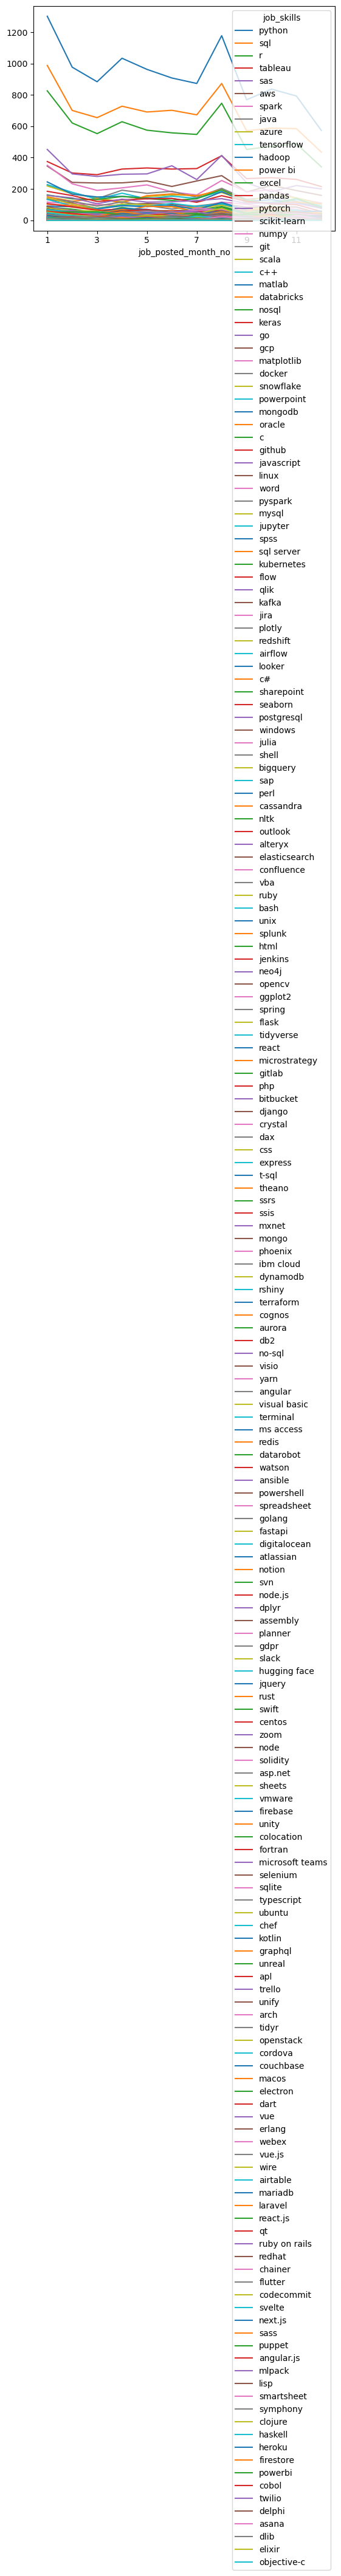

In [19]:
df_DS_US_pivot.plot(kind='line')

In [21]:
DS_total = df_DS_US.groupby('job_posted_month_no').size()

In [27]:
df_DS_US_percent = df_DS_US_pivot.div(DS_total/100, axis=0)
df_DS_US_percent = df_DS_US_percent.reset_index()
df_DS_US_percent['job_posted_month'] = df_DS_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_DS_US_percent = df_DS_US_percent.set_index('job_posted_month')
df_DS_US_percent = df_DS_US_percent.drop(columns='job_posted_month_no')

df_DS_US_percent

job_skills,python,sql,r,tableau,sas,aws,spark,java,azure,tensorflow,...,heroku,firestore,powerbi,cobol,twilio,delphi,asana,dlib,elixir,objective-c
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,78.433735,59.518072,49.759036,22.590361,27.228916,20.843373,21.144578,13.554217,13.192771,13.734940,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.060241,0.000000,0.000000,0.000000,0.000000
Feb,77.601271,55.679110,49.324861,23.987292,23.510723,19.221604,18.506751,14.058777,13.423352,14.217633,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,73.544093,54.492512,46.006656,24.209651,23.294509,19.800333,15.890183,11.480865,11.813644,11.231281,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083195,0.000000,0.000000
Apr,79.722436,56.129530,48.496530,25.212028,22.667695,18.427140,15.959907,14.803392,9.097918,13.338473,...,0.000000,0.000000,0.000000,0.077101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,77.786753,55.815832,46.445880,26.978998,23.909532,20.274637,18.255250,13.893376,12.116317,11.066236,...,0.000000,0.000000,0.080775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,76.754015,59.340659,47.168216,27.641589,29.416737,18.258664,15.300085,15.638208,13.693998,13.017751,...,0.084531,0.000000,0.000000,0.000000,0.084531,0.000000,0.000000,0.000000,0.084531,0.000000
Jul,77.393617,59.663121,48.581560,29.255319,23.049645,22.251773,14.361702,13.031915,14.007092,12.411348,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,75.853187,56.213780,48.100451,26.529298,26.658081,18.351578,16.355441,13.135866,11.397296,11.912428,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,71.936389,53.414406,42.282507,24.883068,22.450889,16.931712,17.025257,12.535080,11.318990,10.664172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


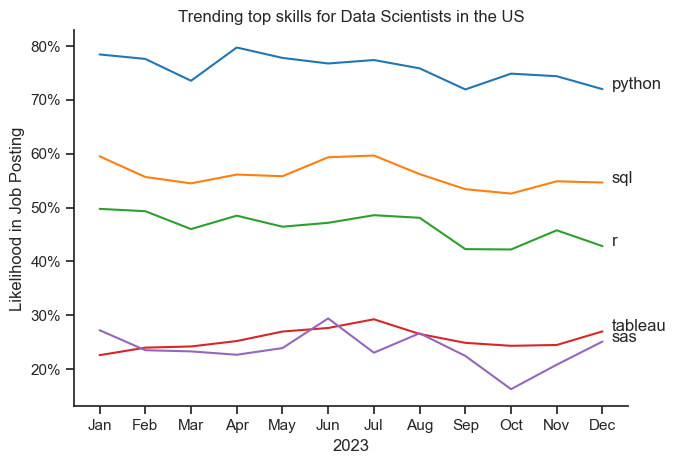

In [42]:
df_plot = df_DS_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()
plt.title('Trending top skills for Data Scientists in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.tight_layout()
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()
